In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv('Salary_Data.csv')
df
df.columns



Index(['YearsExperience', 'Salary'], dtype='object')

In [2]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


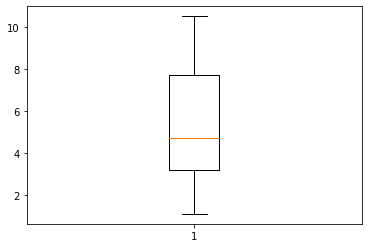

In [3]:
plt.boxplot(df.YearsExperience)
plt.show()

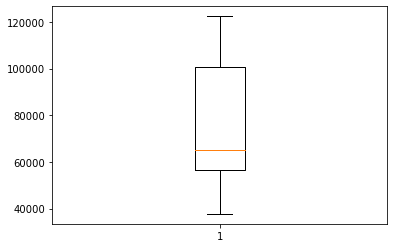

In [25]:
plt.boxplot(df.Salary)
plt.show()

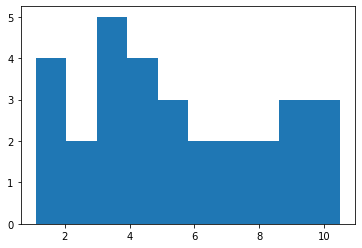

In [26]:
plt.hist(df.YearsExperience)
plt.show()

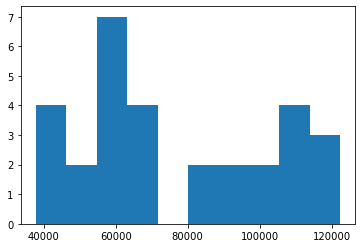

In [27]:
plt.hist(df.Salary)
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
import seaborn as sns 

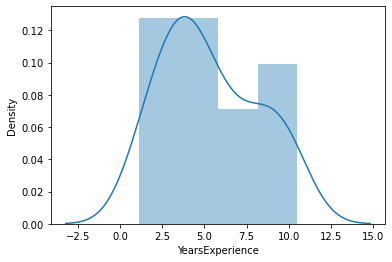

In [28]:
sns.distplot(df.YearsExperience)
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Salary', ylabel='Density'>

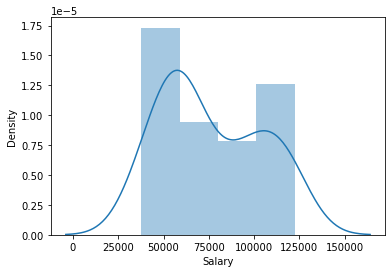

In [10]:
sns.distplot(df.Salary)

Text(0, 0.5, 'Salary')

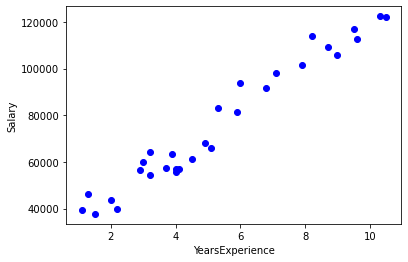

In [11]:
plt.plot(df.YearsExperience,df.Salary,"bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
import statsmodels.formula.api as smf 
model=smf.ols("YearsExperience~Salary",data=df).fit()
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        13:41:50   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [16]:
model.resid_pearson

array([-0.83601202, -1.6619283 ,  0.1039828 , -0.04076678,  0.90717063,
       -0.75556182, -1.18153318,  0.11640909, -1.5736192 ,  0.48711814,
       -0.19801879,  1.22354877,  1.02699848,  1.1729327 ,  1.15941355,
        0.67319349,  1.32960101, -1.21963712,  0.07323614, -1.88542188,
       -0.17815314, -0.78191494,  0.0413    , -1.5722537 ,  0.00260051,
        1.15376408,  0.06378169,  0.96313051,  0.48257285,  0.90406645])

In [17]:
#print(model.conf_int(0.05))

In [18]:
pred=model.predict(df.Salary)
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [19]:
rmse_lin=np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred))**2))
rmse_lin

0.5788774181748744

Text(0, 0.5, 'Salary')

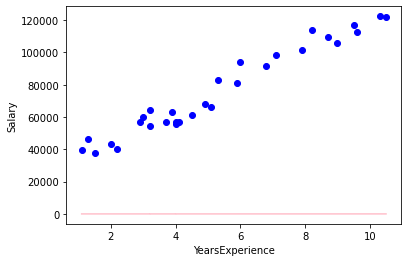

In [20]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color="blue")
plt.plot(df['YearsExperience'],pred,color="pink")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [21]:
model2=smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [22]:
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [23]:
model2.resid_pearson

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        13:41:51   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""